In [1]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
# import the data and modules
import pandas as pd
import numpy as np
from sklearn import datasets
# load iris
iris = datasets.load_iris()

In [2]:
# use petal length and petal width only for this analysis
X = iris.data
y = iris.target

In [3]:
# place the iris data into a pandas dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [4]:
# standardize the features
scaler = StandardScaler()

In [5]:
# fit the scaler to the training set and transform
scaler.fit(X_train)

StandardScaler()

In [6]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

<Figure size 640x480 with 0 Axes>

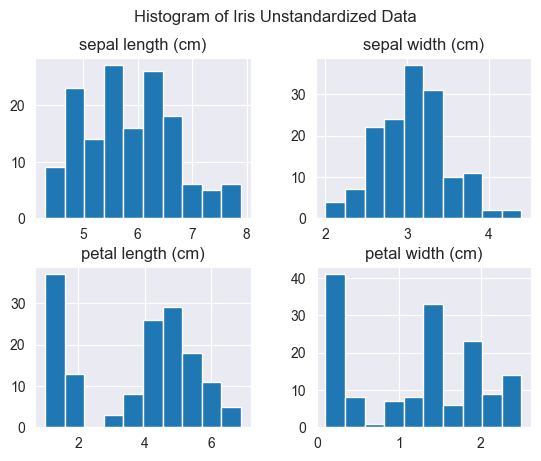

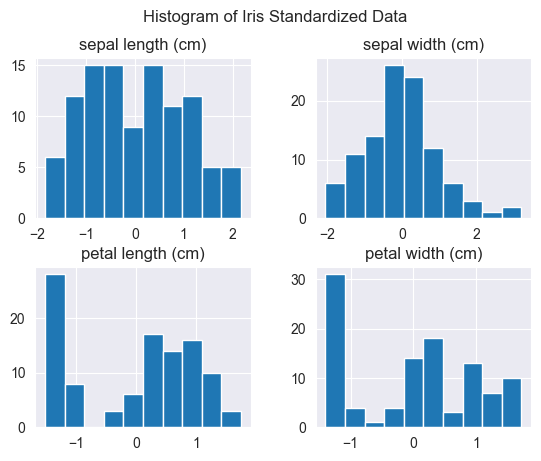

In [7]:
# plot using a histogram
import matplotlib.pyplot as plt
plt.figure()
iris_df.hist()
plt.suptitle("Histogram of Iris Unstandardized Data")
pd.DataFrame(X_train_std, columns=iris.feature_names).hist()
plt.suptitle("Histogram of Iris Standardized Data")
plt.show()

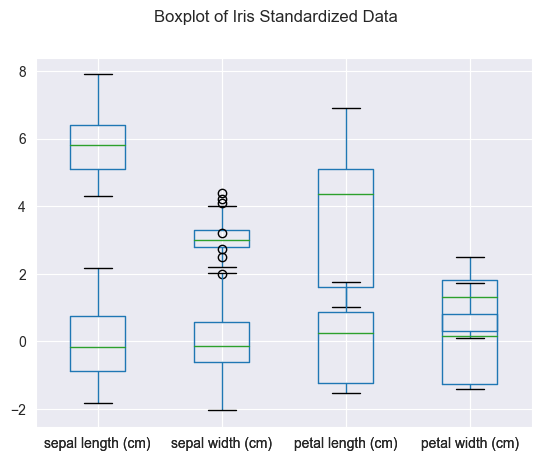

In [8]:
# plot using a boxplot
plt.figure()
iris_df.boxplot()
plt.suptitle("Boxplot of Iris Unstandardized Data")
pd.DataFrame(X_train_std, columns=iris.feature_names).boxplot()
plt.suptitle("Boxplot of Iris Standardized Data")
plt.show()

In [9]:
# SVM one vs rest (train one binary classifier for each class)
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [10]:
reduced_data_train = pca.fit_transform(X_train_std)
reduced_data_test = pca.transform(X_test_std)

In [11]:
classifier = SVC(kernel='linear', C=1, random_state=0, decision_function_shape='ovr', gamma=.1)
classifier.fit(reduced_data_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear', random_state=0)

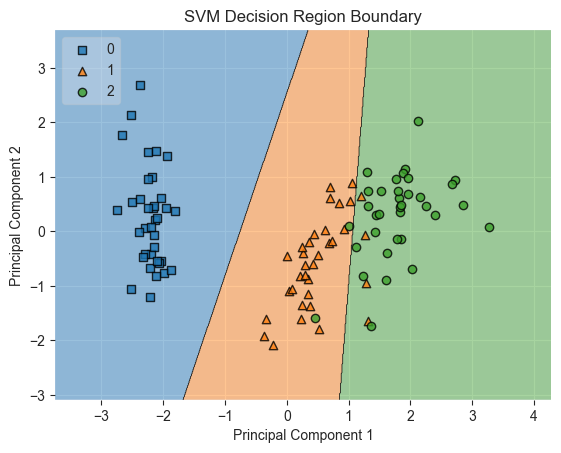

In [12]:
# plot the decision boundaries
plot_decision_regions(reduced_data_train, y_train, clf=classifier, legend=2)
plt.title("SVM Decision Region Boundary", fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [13]:
# SVM (one vs one)
plt.figure(figsize=(10,3))
classifier = SVC(kernel='linear', C=1, random_state=0, decision_function_shape='ovo', gamma=.1)
classifier.fit(reduced_data_train, y_train)

SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='linear',
    random_state=0)

<Figure size 1000x300 with 0 Axes>

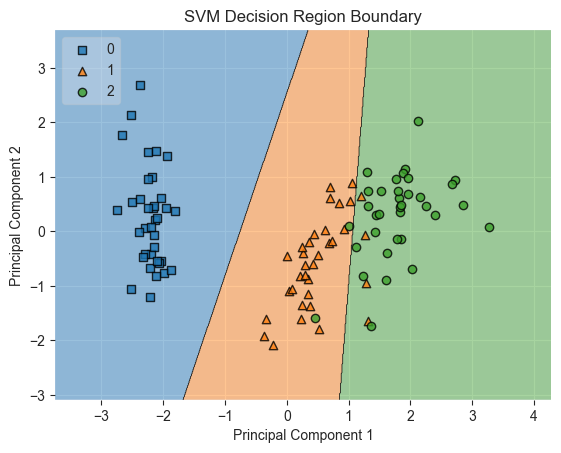

In [14]:
# plot the decision boundaries
plot_decision_regions(reduced_data_train, y_train, clf=classifier, legend=2)
plt.title("SVM Decision Region Boundary", fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()